In [61]:
import os
import json
import argparse
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
cwd = os.getcwd()

print(cwd)
# sns.set_context('poster')
# Parse training configuration
#parser = argparse.ArgumentParser()
#parser.add_argument('--folder', type=str, default='runs', help='folder name')
#config = parser.parse_args()

scores = {'env':[], 'replay_type':[], 'buffer_size':[], 'parameters':[], 'cumulative_reward':[], 'episode': [], 'duration': [], 'reward': []}

config_folder = 'runs'



for env in os.listdir(config_folder):
    for er in os.listdir(f'{config_folder}/{env}'):
        for buff in os.listdir(f'{config_folder}/{env}/{er}'):
            for params in os.listdir(f'{config_folder}/{env}/{er}/{buff}'):
                for run in os.listdir(f'{config_folder}/{env}/{er}/{buff}/{params}'):
                    try:
                        with open(f'{config_folder}/{env}/{er}/{buff}/{params}/{run}/history.json', 'r') as f:
                            d = json.load(f)
                        
                        rewards = np.array(d['rewards'])
                        durations = np.array(d['durations'])
                        
                        durations = pd.Series(durations).rolling(10).mean()
                        rewards = pd.Series(rewards).rolling(10).mean()
                        
                        n = len(rewards)
                        scores['episode'] += list(range(len(rewards)))
                        scores['env'] += [env] * n
                        scores['replay_type'] += [er] * n
                        scores['buffer_size'] += [buff] * n
                        scores['parameters'] += [params] * n
                        
                        scores['duration'] += list(durations)
                        scores['cumulative_reward'] += list(np.cumsum(rewards))
                        scores['reward'] += list(rewards)
                        
                        
                    except FileNotFoundError:
                        pass

                    
scores = pd.DataFrame(scores)

scores


/home/max/develop/master_develop/rl-lab/RL_reprod/code


,env,replay_type,buffer_size,parameters,cumulative_reward,episode,duration,reward
0,mountain_car,uniform_replay,buffer_30000,mountaincar1_S_30000,NaN,0,NaN,NaN
1,mountain_car,uniform_replay,buffer_30000,mountaincar1_S_30000,NaN,1,NaN,NaN
2,mountain_car,uniform_replay,buffer_30000,mountaincar1_S_30000,NaN,2,NaN,NaN
3,mountain_car,uniform_replay,buffer_30000,mountaincar1_S_30000,NaN,3,NaN,NaN
4,mountain_car,uniform_replay,buffer_30000,mountaincar1_S_30000,NaN,4,NaN,NaN
...,...,...,...,...,...,...,...,...
12195,acrobot,prioritized_replay,buffer_3000,acrobot1_P_3000,-38669.3,295,110.4,-109.4
12196,acrobot,prioritized_replay,buffer_3000,acrobot1_P_3000,-38782.3,296,114.0,-113.0
12197,acrobot,prioritized_replay,buffer_3000,acrobot1_P_3000,-38899.0,297,117.7,-116.7
12198,acrobot,prioritized_replay,buffer_3000,acrobot1_P_3000,-39016.0,298,118.0,-117.0


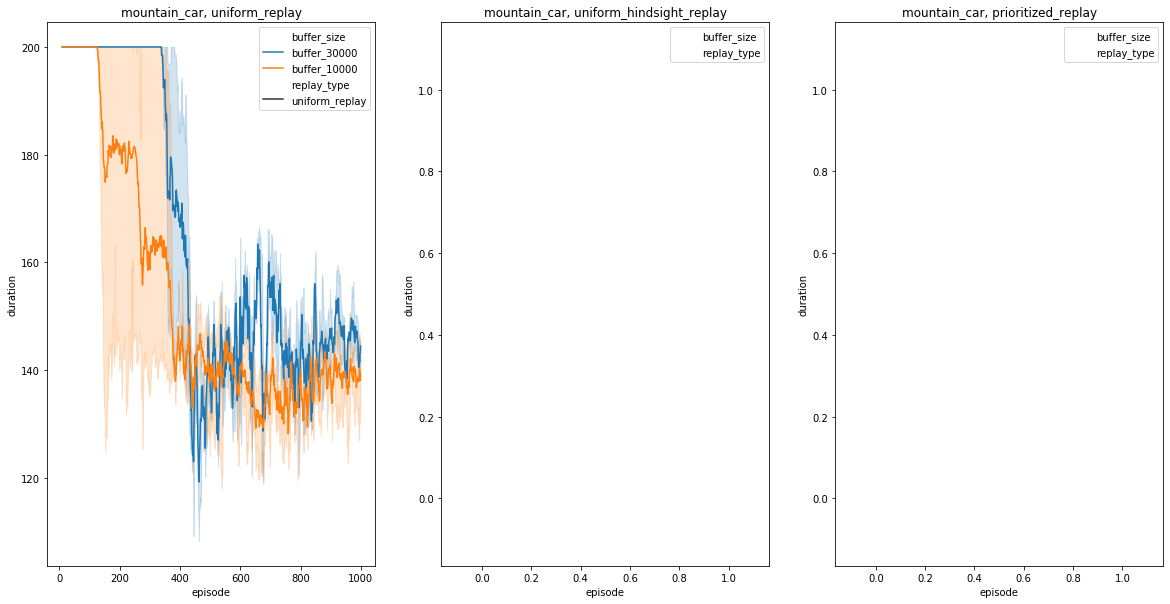

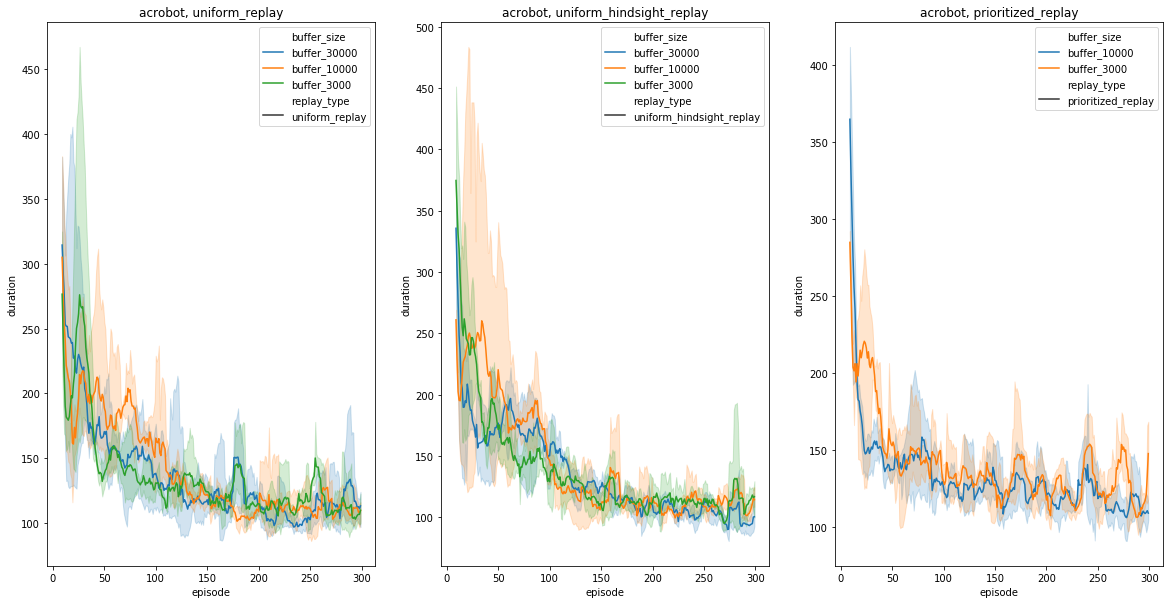

In [62]:
for env in scores['env'].unique():
    fig, ax = plt.subplots(1, 3, figsize=(20,10))
    
    for index, replay_type in enumerate(scores['replay_type'].unique()):
        
        part = scores[(scores['env'] == env) & (scores['replay_type'] == replay_type)]
        
        sns.lineplot(ax=ax[index], data=part, x='episode', y='duration', hue='buffer_size', style='replay_type')
        ax[index].set_title(f"{env}, {replay_type}")
    
    plt.show()

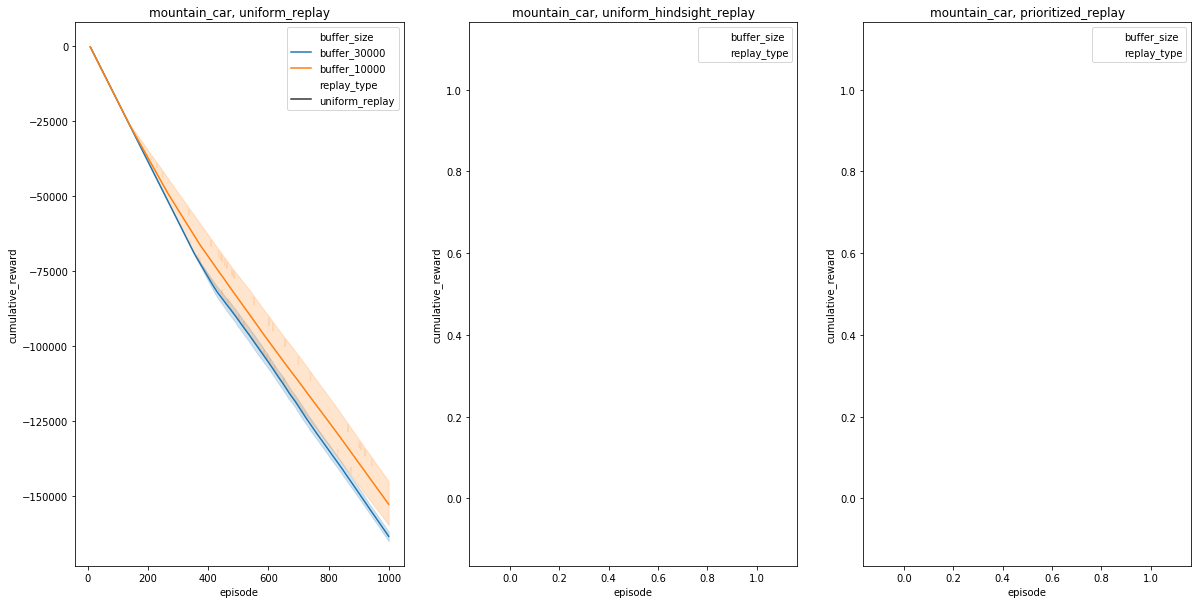

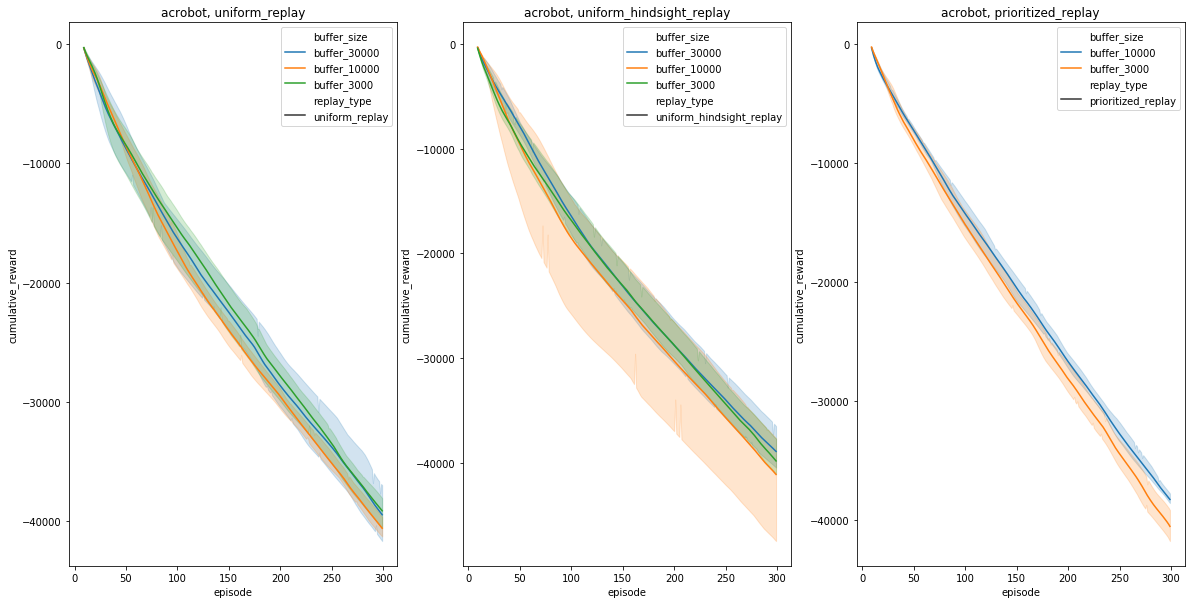

In [59]:
for env in scores['env'].unique():
    fig, ax = plt.subplots(1, 3, figsize=(20,10))
    
    for index, replay_type in enumerate(scores['replay_type'].unique()):
        
        part = scores[(scores['env'] == env) & (scores['replay_type'] == replay_type)]
        
        sns.lineplot(ax=ax[index], data=part, x='episode', y='cumulative_reward', hue='buffer_size', style='replay_type')
        ax[index].set_title(f"{env}, {replay_type}")
    
    plt.show()

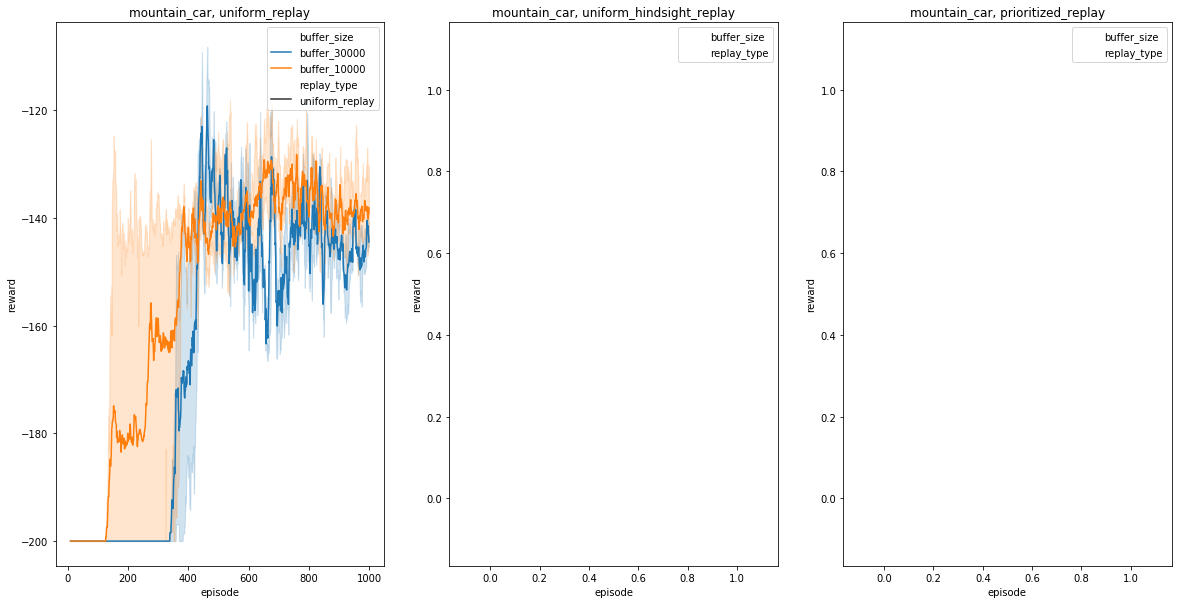

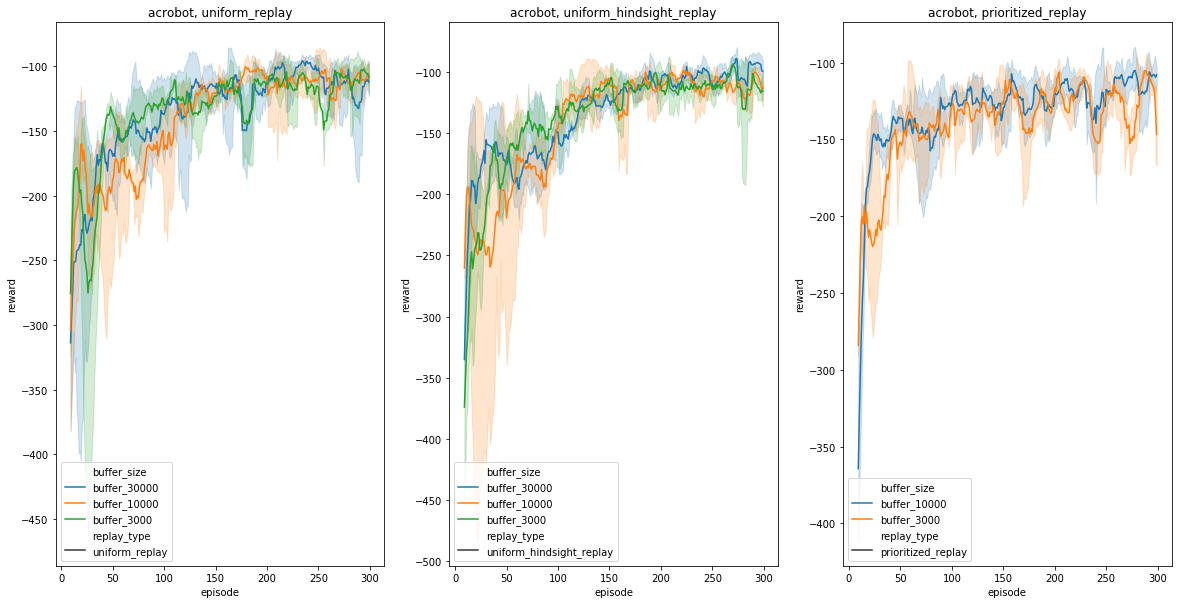

In [60]:
for env in scores['env'].unique():
    fig, ax = plt.subplots(1, 3, figsize=(20,10))
    
    for index, replay_type in enumerate(scores['replay_type'].unique()):
        
        part = scores[(scores['env'] == env) & (scores['replay_type'] == replay_type)]
        
        sns.lineplot(ax=ax[index], data=part, x='episode', y='reward', hue='buffer_size', style='replay_type')
        ax[index].set_title(f"{env}, {replay_type}")
    
    plt.show()